In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv



=== Heart Disease Risk Assessment ===
Please enter your health metrics:

Age (years): 25
Cholesterol (mg/dL): 200
Resting BP (mmHg): 160
Max Heart Rate (bpm): 100
 Depression level: 6

 Result: High Risk (77.2% probability)

Show cluster visualization? (y/n): y


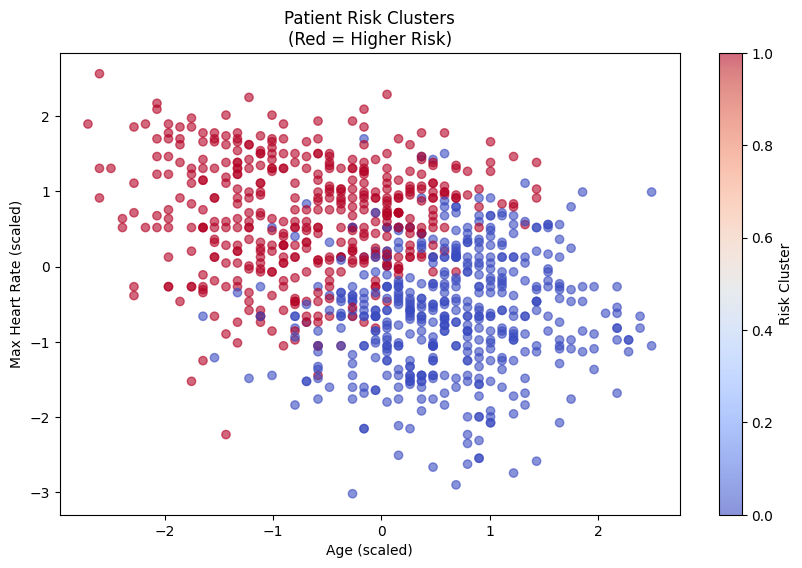

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('heart.csv').dropna().copy()
features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']
X = df[features]

# Pre-trained components
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42, algorithm='elkan')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Dynamic risk mapping
risk_map = {
    0: 'High Risk' if df.groupby('Cluster')['HeartDisease'].mean()[0] > 0.5 else 'Low Risk',
    1: 'Low Risk' if df.groupby('Cluster')['HeartDisease'].mean()[0] > 0.5 else 'High Risk'
}

def get_valid_input(prompt, min_val=0, max_val=300):
    """Validates numerical input within a range"""
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            print(f"Error: Value must be between {min_val}-{max_val}")
        except ValueError:
            print("Invalid input. Please enter a number.")

def predict_risk():
    print("\n=== Heart Disease Risk Assessment ===")
    print("Please enter your health metrics:\n")

    user_data = np.array([
        get_valid_input("Age (years): ", 10, 120),
        get_valid_input("Cholesterol (mg/dL): ", 100, 600),
        get_valid_input("Resting BP (mmHg): ", 60, 250),
        get_valid_input("Max Heart Rate (bpm): ", 40, 220),
        get_valid_input(" Depression level: ", 0, 10)
    ]).reshape(1, -1)

    # Prediction
    user_scaled = scaler.transform(user_data)
    cluster = kmeans.predict(user_scaled)[0]
    risk_prob = df[df['Cluster'] == cluster]['HeartDisease'].mean() * 100

    print(f"\n Result: {risk_map[cluster]} ({risk_prob:.1f}% probability)")
    if risk_map[cluster] == 'High Risk':
        print(" Warning: Higher risk detected. Please consult a cardiologist.")
    else:
        print(" Good news! Your risk appears lower. Maintain healthy habits!")


    if input("\nShow cluster visualization? (y/n): ").lower() == 'y':
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=df['Cluster'], cmap='coolwarm', alpha=0.6)
        plt.xlabel('Age (scaled)')
        plt.ylabel('Max Heart Rate (scaled)')
        plt.title('Patient Risk Clusters\n(Red = Higher Risk)')
        plt.colorbar(label='Risk Cluster')
        plt.show()

# Define the main function to call predict_risk
def main():
    predict_risk()

if __name__ == "__main__":
    main()